In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
image0_df = pd.read_parquet("../data/train_image_data_0.parquet") 
train_df = pd.read_csv("../data/train.csv")
class_map_df = pd.read_csv("../data/class_map.csv")

In [10]:
test_df = pd.read_csv("../data/test.csv")

# class_map.csv

3 component_type: `grapheme_root`, `vowel_diacritic`, `consonant_diacritic`

`grapheme_root`: 168 unique labels

`vowel_diacritic`: 11 unique labels

`consonant_diacritic`: 7 unique labels

In [3]:
class_map_df.head()

,component_type,label,component
0,grapheme_root,0,ং
1,grapheme_root,1,ঃ
2,grapheme_root,2,অ
3,grapheme_root,3,আ
4,grapheme_root,4,ই


In [4]:
class_map_df["component_type"].unique()

array(['grapheme_root', 'vowel_diacritic', 'consonant_diacritic'],
      dtype=object)

In [5]:
class_map_df[class_map_df["component_type"]=="grapheme_root"]

,component_type,label,component
0,grapheme_root,0,ং
1,grapheme_root,1,ঃ
2,grapheme_root,2,অ
3,grapheme_root,3,আ
4,grapheme_root,4,ই
...,...,...,...
163,grapheme_root,163,হ্ল
164,grapheme_root,164,ৎ
165,grapheme_root,165,ড়
166,grapheme_root,166,ঢ়


In [7]:
class_map_df[class_map_df["component_type"]=="vowel_diacritic"]

,component_type,label,component
168,vowel_diacritic,0,0
169,vowel_diacritic,1,া
170,vowel_diacritic,2,ি
171,vowel_diacritic,3,ী
172,vowel_diacritic,4,ু
173,vowel_diacritic,5,ূ
174,vowel_diacritic,6,ৃ
175,vowel_diacritic,7,ে
176,vowel_diacritic,8,ৈ
177,vowel_diacritic,9,ো


In [8]:
class_map_df[class_map_df["component_type"]=="consonant_diacritic"]

,component_type,label,component
179,consonant_diacritic,0,0
180,consonant_diacritic,1,ঁ
181,consonant_diacritic,2,র্
182,consonant_diacritic,3,র্য
183,consonant_diacritic,4,্য
184,consonant_diacritic,5,্র
185,consonant_diacritic,6,্র্য


# train.csv

In [9]:
train_df

,image_id,grapheme_root,vowel_diacritic,consonant_diacritic,grapheme
0,Train_0,15,9,5,ক্ট্রো
1,Train_1,159,0,0,হ
2,Train_2,22,3,5,খ্রী
3,Train_3,53,2,2,র্টি
4,Train_4,71,9,5,থ্রো
...,...,...,...,...,...
200835,Train_200835,22,7,2,র্খে
200836,Train_200836,65,9,0,ত্তো
200837,Train_200837,2,1,4,অ্যা
200838,Train_200838,152,9,0,স্নো


# test.csv

In [11]:
test_df

,row_id,image_id,component
0,Test_0_consonant_diacritic,Test_0,consonant_diacritic
1,Test_0_grapheme_root,Test_0,grapheme_root
2,Test_0_vowel_diacritic,Test_0,vowel_diacritic
3,Test_1_consonant_diacritic,Test_1,consonant_diacritic
4,Test_1_grapheme_root,Test_1,grapheme_root
5,Test_1_vowel_diacritic,Test_1,vowel_diacritic
6,Test_2_consonant_diacritic,Test_2,consonant_diacritic
7,Test_2_grapheme_root,Test_2,grapheme_root
8,Test_2_vowel_diacritic,Test_2,vowel_diacritic
9,Test_3_consonant_diacritic,Test_3,consonant_diacritic


# free explore


In [28]:
image0_df

,image_id,0,1,2,3,4,5,6,7,8,...,32322,32323,32324,32325,32326,32327,32328,32329,32330,32331
0,Train_0,254,253,252,253,251,252,253,251,251,...,253,253,253,253,253,253,253,253,253,251
1,Train_1,251,244,238,245,248,246,246,247,251,...,255,255,255,255,255,255,255,255,255,254
2,Train_2,251,250,249,250,249,245,247,252,252,...,254,253,252,252,253,253,253,253,251,249
3,Train_3,247,247,249,253,253,252,251,251,250,...,254,254,254,254,254,253,253,252,251,252
4,Train_4,249,248,246,246,248,244,242,242,229,...,255,255,255,255,255,255,255,255,255,255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50205,Train_50205,247,250,250,250,252,250,250,250,251,...,246,248,252,252,249,248,250,247,243,243
50206,Train_50206,250,251,250,244,245,243,246,248,246,...,255,255,255,255,255,255,255,255,255,253
50207,Train_50207,246,245,246,246,245,245,247,247,245,...,247,246,248,246,245,248,249,246,243,245
50208,Train_50208,246,242,240,244,247,242,239,241,245,...,247,247,247,247,247,246,246,248,248,247


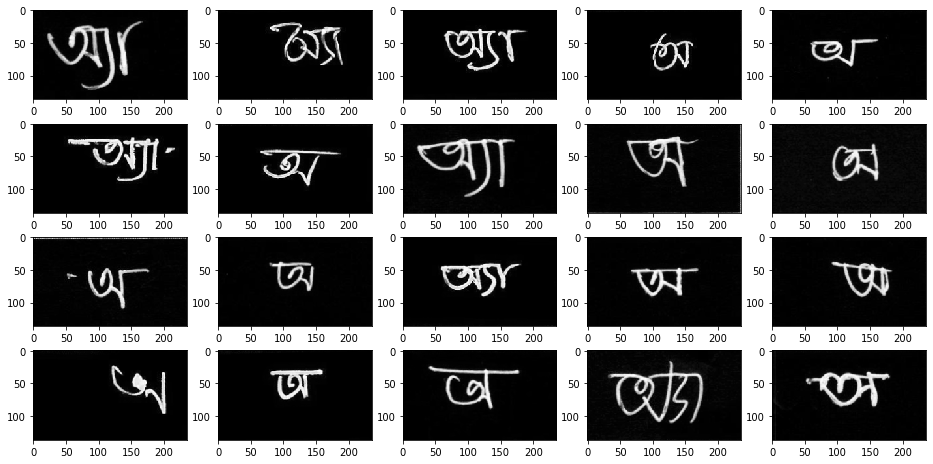

In [48]:
image_15_id = list(train_df[train_df["grapheme_root"]==2]["image_id"])

f, ax = plt.subplots(4, 5, figsize=(16, 8))
ax = ax.flatten()

for i in range(20):
    # print(image_15_id[i])
    image_np = image0_df[image0_df["image_id"]==image_15_id[i]].values[0][1:].astype(np.uint8).reshape(137,236)
    ax[i].imshow(image_np, cmap='Greys')


In [49]:
train_df[train_df["grapheme_root"]==2]

,image_id,grapheme_root,vowel_diacritic,consonant_diacritic,grapheme
1226,Train_1226,2,1,4,অ্যা
1244,Train_1244,2,1,4,অ্যা
1520,Train_1520,2,1,4,অ্যা
2030,Train_2030,2,0,0,অ
2108,Train_2108,2,0,0,অ
...,...,...,...,...,...
195973,Train_195973,2,1,4,অ্যা
196385,Train_196385,2,1,4,অ্যা
197664,Train_197664,2,1,4,অ্যা
198908,Train_198908,2,1,4,অ্যা


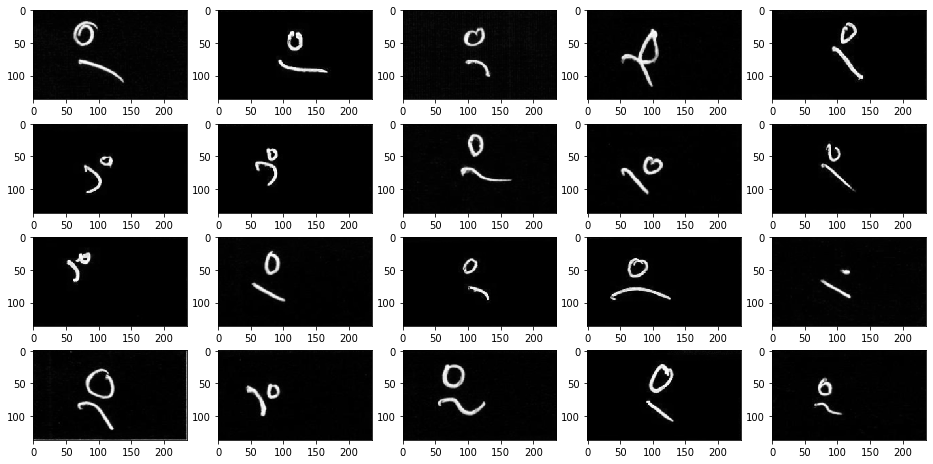

In [72]:
cond = (train_df["grapheme_root"]==0) & (train_df["vowel_diacritic"]==0) & (train_df["consonant_diacritic"]==0)

train_df[cond]

image_15_id = list(train_df[cond]["image_id"])

f, ax = plt.subplots(4, 5, figsize=(16, 8))
ax = ax.flatten()

for i in range(20):
    # print(image_15_id[i])
    image_np = image0_df[image0_df["image_id"]==image_15_id[i]].values[0][1:].astype(np.uint8).reshape(137,236)
    ax[i].imshow(image_np, cmap='Greys')

# split train/test evenly

In [50]:
train_df

,image_id,grapheme_root,vowel_diacritic,consonant_diacritic,grapheme
0,Train_0,15,9,5,ক্ট্রো
1,Train_1,159,0,0,হ
2,Train_2,22,3,5,খ্রী
3,Train_3,53,2,2,র্টি
4,Train_4,71,9,5,থ্রো
...,...,...,...,...,...
200835,Train_200835,22,7,2,র্খে
200836,Train_200836,65,9,0,ত্তো
200837,Train_200837,2,1,4,অ্যা
200838,Train_200838,152,9,0,স্নো


In [59]:
train_df["combine"] = (
    train_df["grapheme_root"].apply(lambda x: str(x)) + "!" + 
    train_df["vowel_diacritic"].apply(lambda x: str(x)) + "!" +
    train_df["consonant_diacritic"].apply(lambda x: str(x)) 
)

In [63]:
train_df["combine"].nunique()

1292

In [74]:
combine_count = train_df.groupby("combine")["image_id"].count()

In [78]:
combine_count.sort_values()

combine
19!0!0     118
116!3!0    126
32!9!0     128
141!1!4    128
62!2!0     129
          ... 
29!0!0     178
167!7!0    283
64!3!2     289
72!0!2     297
64!7!2     303
Name: image_id, Length: 1292, dtype: int64